In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:
fiscal_df = pd.read_csv('data/Sdf16_1a.txt', sep = '\t')
rla_df = pd.read_csv('data/rla-achievement-lea-sy2015-16.csv', sep = ',')
math_df = pd.read_csv('data/math-achievement-lea-sy2015-16.csv', sep = ',')

membership_df = pd.read_csv('data/ccd_lea_052_1516_w_1a_011717.csv', sep = ',')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,45,129,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
fiscal_df

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18703,5680250,51502040100000,56,56039,N,27220,Region V BOCES,Wyoming,WY,07,...,N,N,N,N,N,N,N,N,N,N
18704,5680251,N,56,56021,N,16940,Wyoming Department of Family Services,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N
18705,5680252,N,56,56005,N,23940,Youth Emergency Services Inc. - Administration...,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N
18706,5680253,N,56,56025,N,16220,Wyoming Behavioral Institute - Administration ...,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N


In [96]:
fiscal_df['TFEDREV'].sum() * .15

8340410870.7

In [100]:
to_cut = fiscal_df['TFEDREV'].sum() * .15
tocut_df = fiscal_df[['LEAID','TOTALEXP','V33', 'STNAME', 'NAME', 'TFEDREV']]
tocut_df = tocut_df[(tocut_df['TFEDREV'] > 0) & (tocut_df['V33'] > 0)]
tocut_df['percapita_spending'] = tocut_df['TFEDREV']/tocut_df['V33']

In [136]:
for i, v in tocut_df.sort_values('percapita_spending', ascending = False).iterrows():
    
    if ((to_cut - (v['TFEDREV'] * .20)) > 0):
        
        #print('to_cut: %f' % (v['TFEDREV'] * .20))
        #print('remaning %f' % to_cut)
        #print('\n')
        
        tocut_df.loc[i, 'to_cut'] = v['TFEDREV'] * .20
        to_cut -= (v['TFEDREV'] * .20)


        tocut_df.loc[i, 'STNAME'] = v['STNAME']
        tocut_df.loc[i, 'NAME'] = v['NAME']
        
    else:
        tocut_df.loc[i, 'to_cut'] = 0

## Problem 1

For the districts you selected for budget cuts in HW 3 Problem 4, calculate and visualize the proportion of each district’s total funding that will be lost.
Which districts will be affected by your budget cuts the most?


#### According to my solution majority of the districts recieve no budget cuts. The distribution appears to be log normal. Further the distribution of percentage of budget cuts follows a bimodal distribution with most districts receiving 0 budget cuts.

Text(0.5, 0, 'Amount of Budget Cut')

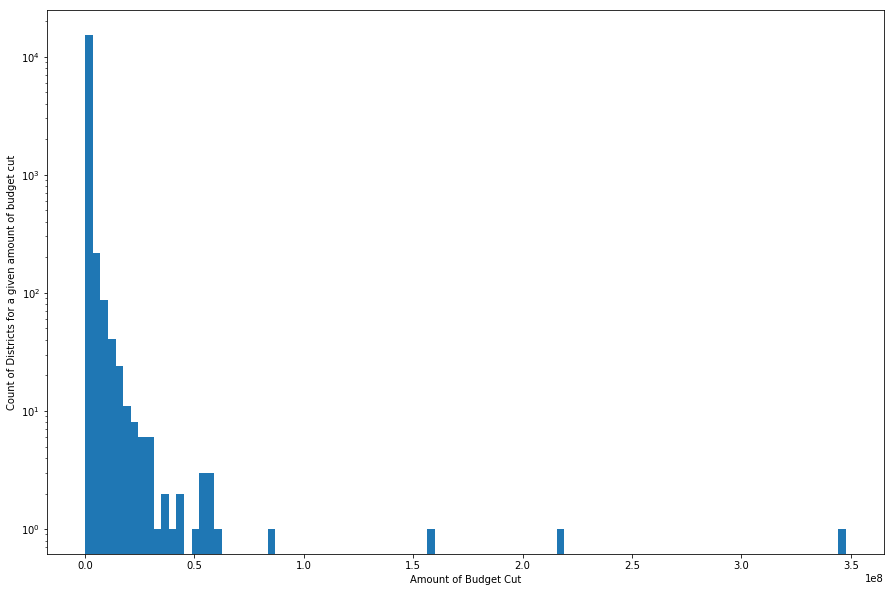

In [107]:
plt.figure()
tocut_df['to_cut'].plot.hist(bins = 100, log = True, figsize = (15,10))
plt.ylabel('Count of Districts for a given amount of budget cut')
plt.xlabel('Amount of Budget Cut')

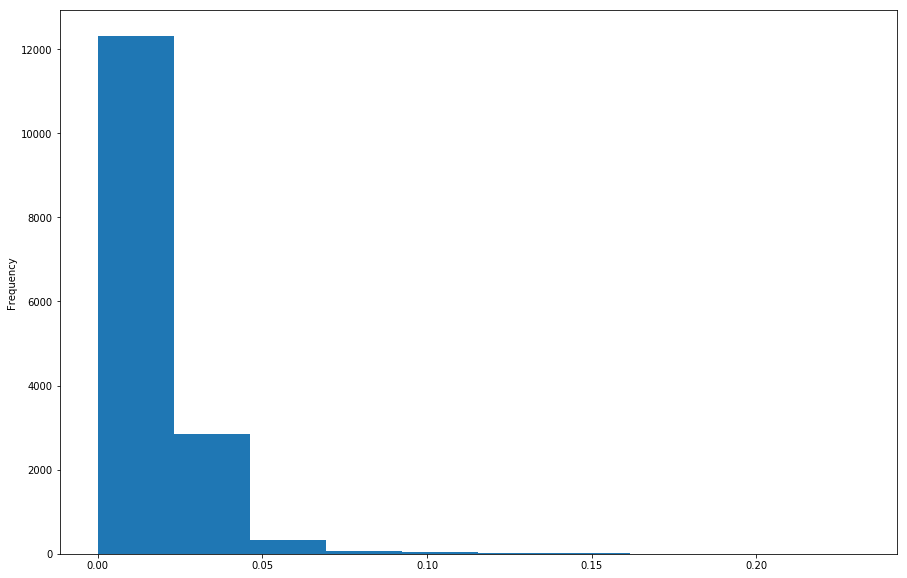

In [108]:
(tocut_df['to_cut']/tocut_df['TOTALEXP']).plot.hist(figsize = (15,10))

## Problem 2

A common problem with purely data-driven solutions is that they can inadvertently perpetuate hidden pre-existing biases in the data, and further disadvantage groups that are already disadvantaged.
Calculate the proportion of enrolled students by race for each district, then visualize the distributions of these for districts that received budget cuts versus districts that did not receive budget cuts.
Comment on whether the the distributions appear to be the same or different. Did your selection include any hidden biases, or manage to avoid them?

### It appears my strategy of cutting the budgets of districts that have higher per capita expenditures backfired as it appears that the higher per capita spending was targetted at minorities. Of the districts that saw a budget cut, we see higher representation of minorities, For Example: 35% Hispanics (up from 27%) , 20% African Americans (up from 14%). Asians appear to be the only minority demographic whose representation has gone down in the budget cuts.

In [109]:
tocut_df = pd.merge(tocut_df, membership_df[['LEAID', 'TOTAL', 'AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']])

In [110]:
tocut_df['BL_proportion'] = tocut_df['BL'] / tocut_df['TOTAL']
tocut_df['AM_proportion'] = tocut_df['AM'] / tocut_df['TOTAL']
tocut_df['HP_proportion'] = tocut_df['HP'] / tocut_df['TOTAL']
tocut_df['AS_proportion'] = tocut_df['AS'] / tocut_df['TOTAL']
tocut_df['WH_proportion'] = tocut_df['WH'] / tocut_df['TOTAL']
tocut_df['HI_proportion'] = tocut_df['HI'] / tocut_df['TOTAL']
tocut_df['TR_proportion'] = tocut_df['TR'] / tocut_df['TOTAL']

### Proportion of Students across the whole dataset

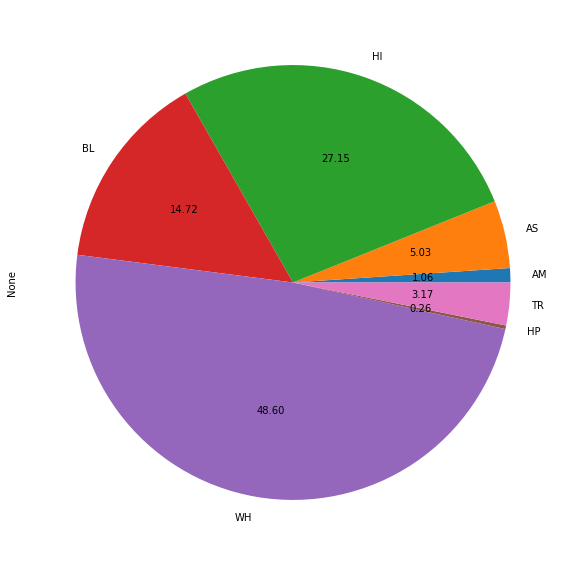

In [111]:
tocut_df[['AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']].sum().plot.pie(autopct='%.2f', figsize = (10, 10))

### Proportion of Students that recieved a budget cut

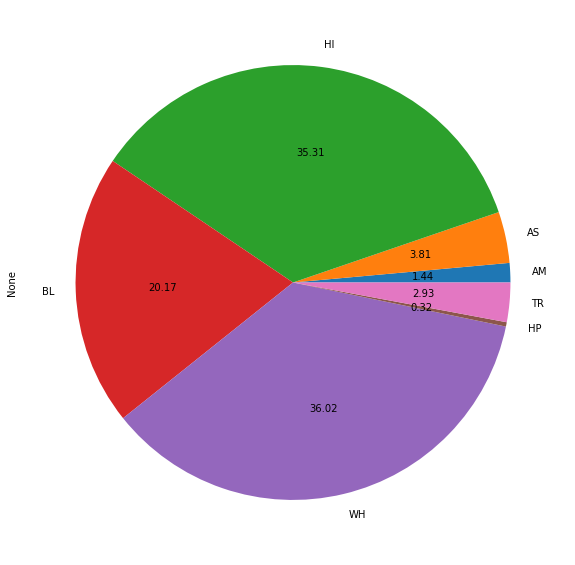

In [112]:
tocut_df[tocut_df['to_cut'] > 0][['AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']].sum().plot.pie(autopct='%.2f', figsize = (10, 10))

### Proportion of Students that did not recieve a budget cut

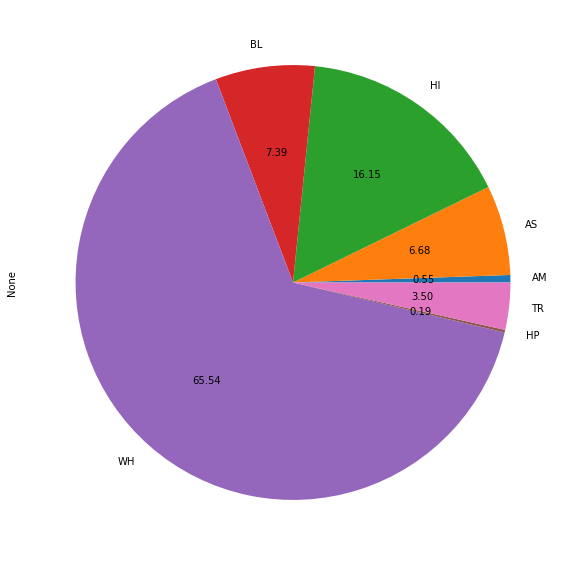

In [113]:
tocut_df[tocut_df['to_cut'] == 0][['AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']].sum().plot.pie(autopct='%.2f', figsize = (10, 10))

## Problem 3: 
Calculate the proportion of enrolled students by disability status (students with an IEP under IDEA) for each district, then visualize the distributions of these proportions for districts that received budget cuts versus districts that did not receive budget cuts.Comment on whether the the distributions appear to be the same or different. Did your selection include any hidden biases, or manage to avoid them?

### It appears that my solution has the same effect on disabled and non-disabled students alike.

In [115]:
disabled_df = pd.read_csv('data/ccd_lea_002089_1516_w_1a_011717.csv')

In [118]:
disabled_df = pd.merge(tocut_df, disabled_df)

In [121]:
disabled_df['dis_proportion'] = disabled_df['SPECED'] / disabled_df['TOTAL']

In [128]:
disabled_df['disabled'] = disabled_df['SPECED']

In [130]:
disabled_df['not_disabled'] = disabled_df['TOTAL'] - disabled_df['SPECED']

### Proportion of disabled students across the whole dataset

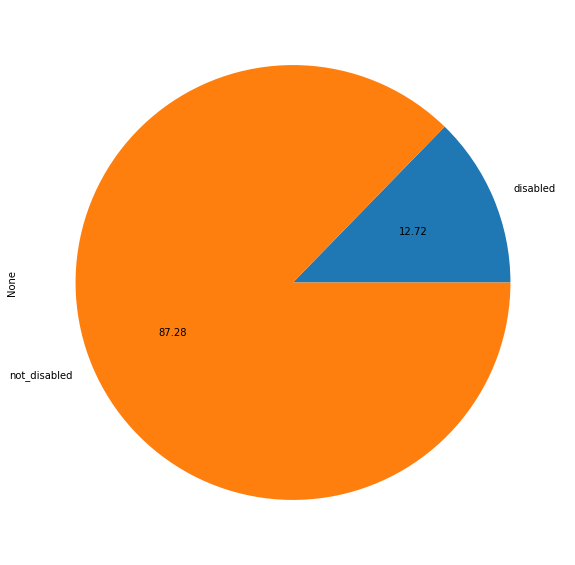

In [134]:
disabled_df[['disabled', 'not_disabled']].sum().plot.pie(autopct='%.2f', figsize = (10, 10))

### Proportion of disabled students recieving a budget cut

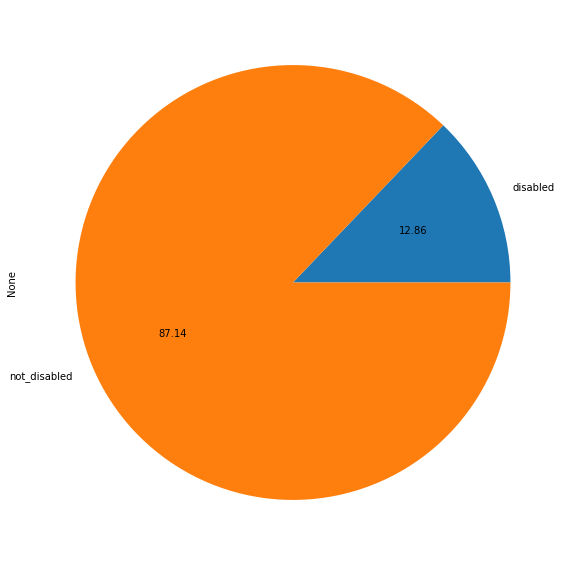

In [135]:
disabled_df[disabled_df['to_cut'] > 0][['disabled', 'not_disabled']].sum().plot.pie(autopct='%.2f', figsize = (10, 10))

### Problem 4
Choose and critique one of your fellow classmates’ selection of schools for budget cuts in HW 3 Problem 4 and Problem 5. What was the justification of their selection? Discuss any advantages or disadvantages of their approach.


#### I choose Sarthak Kothari's strategy for budget cut. His method appears to be the one least likely to hurt overall as the it minimizes the fiscal panalty for schools that are already not doing so well. Furthermore, it's more nuanced since it's looking at proficiency. On the downside however, it might not be the most fair way as the schools that might be working hard to to achieve profeciency are the ones being penalised the most.

### Problem 5

The mapreduce lecture was very helpful in that it helped us breakdown a very useful framework into it's essential components. This allowed us to get an intuitive sense of what the framework was all about and go and explore firther if neccesary. Furthermore it also allowed me to do well in an inteview recently as well.